In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skbeam.core.correlation import multi_tau_auto_corr

plt.rc('lines', linewidth=2)

Create reference set of speckles

In [3]:
def to_beta(g):
    return (g-1)/(g[1]-1)

In [4]:
npix = 50
nimages = 400
perfect_speckle_image = 1e-6 + 2*np.round(np.random.rand(npix, npix))
perfect_speckle_image /= perfect_speckle_image.mean()

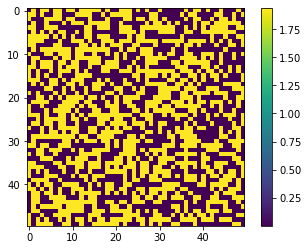

In [5]:
fig, ax = plt.subplots()

art = ax.imshow(perfect_speckle_image, interpolation=None)
plt.colorbar(art, ax=ax)

Analyze situation for static signal

In [6]:
M = np.ones(nimages)[:, np.newaxis, np.newaxis] * perfect_speckle_image[np.newaxis, :]
Moffset = M + 1
Mnoise = M + np.array([1*np.random.rand(npix, npix) for _ in range(nimages)])

tau = np.arange(nimages//4, dtype=np.float)
tau[0] = np.NaN # ignore first point

In [7]:
g2, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), M)
g2_offset, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), Moffset)
g2_noise, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), Mnoise)

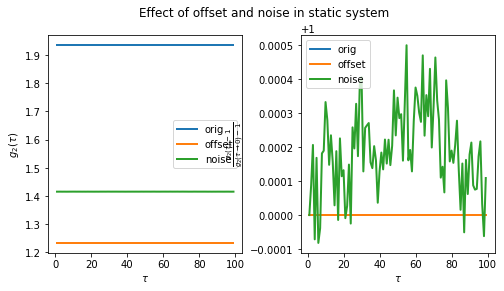

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ax = axs[0]
ax.plot(tau, g2[:, 0], label='orig')
ax.plot(tau, g2_offset[:, 0], label='offset')
ax.plot(tau, g2_noise[:, 0], label='noise')

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$g_2(\tau$)')
ax.legend()

ax = axs[1]
ax.plot(tau, to_beta(g2[:, 0]), label='orig')
ax.plot(tau, to_beta(g2_offset[:, 0]), label='offset')
ax.plot(tau, to_beta(g2_noise[:, 0]), label='noise')

#ax.set_ylim([.99, 1.01])
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\frac{g_2(\tau)-1}{g_2(\tau \rightarrow 0)-1}$')
ax.legend()

fig.suptitle('Effect of offset and noise in static system')
fig.subplots_adjust(wspace=.3)

Create and analyze signal for dynamic situation

In [9]:
M_decay = np.zeros_like(M)
M_decay[0] = perfect_speckle_image
for i in range(1, nimages):
    for _ in range(50):
        r1 = np.floor(npix*np.random.rand(1))[0]
        r2 = np.floor(npix*np.random.rand(1))[0]
        image = M_decay[0]
        image[int(r1), int(r2)] = 1e-6 + 2*np.round(np.random.rand(1))
    M_decay[i] = image/image.mean()

M_decay_offset = M_decay + 1
M_decay_noise = M_decay + np.array([1*np.random.rand(npix, npix) for _ in range(nimages)])

XX, YY = np.meshgrid(np.arange(npix), np.arange(npix))
M_decay_peak = M_decay + np.exp(-(((XX-25)/20)**2 + ((YY-25)/20)*2))

Text(0.5, 1.0, 'Decay')

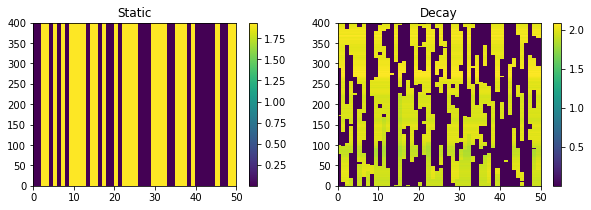

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

ax = axs[0]
art = ax.pcolor(M[:, 20, :])
plt.colorbar(art, ax=ax)
ax.set_title('Static')

ax = axs[1]
art = ax.pcolor(M_decay[:, 20, :])
plt.colorbar(art, ax=ax)
ax.set_title('Decay')


In [11]:
g2_decay, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), M_decay)
g2_decay_offset, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), M_decay_offset)
g2_decay_noise, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), M_decay_noise)
g2_decay_peak, steps = multi_tau_auto_corr(1, M.shape[0]//4, np.ones_like(M[0], dtype=np.int), M_decay_peak)

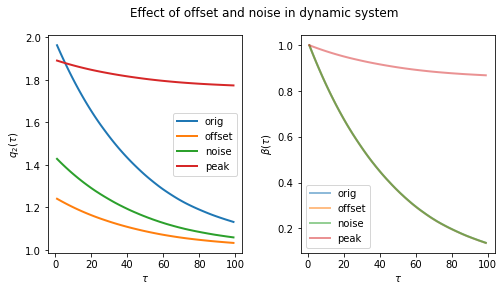

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

ax = axs[0]
ax.plot(tau, g2_decay[:, 0], label='orig')
ax.plot(tau, g2_decay_offset[:, 0], label='offset')
ax.plot(tau, g2_decay_noise[:, 0], label='noise')
ax.plot(tau, g2_decay_peak[:, 0], label='peak')

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$q_2(\tau$)')
ax.legend()

ax = axs[1]
alpha = .5
ax.plot(tau, to_beta(g2_decay[:, 0]), alpha=alpha, label='orig')
ax.plot(tau, to_beta(g2_decay_offset[:, 0]), alpha=alpha, label='offset')
ax.plot(tau, to_beta(g2_decay_noise[:, 0]), alpha=alpha, label='noise')
ax.plot(tau, to_beta(g2_decay_peak[:, 0]), alpha=alpha, label='peak')
ax.set_ylabel(r'$\frac{g_2(\tau)-1}{g_2(\tau \rightarrow 0)-1}$')

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\beta(\tau$)')
ax.legend()

fig.suptitle('Effect of offset and noise in dynamic system')
fig.subplots_adjust(wspace=.3)